# Análise de Dados – Estatísticas do Trabalho

## 1 Projeto

Seja bem-vindo (a)!

Esse notebook está sendo desenvolvido para a disciplina de "Estrutura de dados", ministrada pelo professor Fernando Masanori, do curso de Análise e Desenvolvimento de Sistemas, no ano de 2021, na FATEC de São José dos Campos - SP.

Nosso objetivo é proporcionar um ambiente de análise de dados do trabalho no período da pandemia.

Para entender como foram levantados os requisitos e obter mais informações de como o projeto foi desenvolvido, acesse o [Github](https://github.com/BettoFranca/Analise_dados_publicos_Estatisticas_do_Trabalho_na_Pandemia) da nossa equipe de trabalho.



### Importando as bibliotecas:

In [1]:
import numpy as np
import pandas as pd
import csv
low_memory=False
%matplotlib inline

## 2 Inputs

### Importando os dados
Importamos os dados do [CAGED](https://ftp.mtps.gov.br/pdet/microdados/NOVO%20CAGED/Movimenta%E7%F5es/2021/Abril/) de Abril de 2020 a Abril de 2021 para análisar os dados de admissões, demissões e salário no período:

In [11]:
colunas = ['competência', 'município', 'saldomovimentação','seção','graudeinstrução', 'idade', 'sexo','tipomovimentação','salário','raçacor']

abril20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202004.txt',delimiter=';', usecols=colunas)
maio20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202005.txt',delimiter=';', usecols=colunas)
junho20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202006.txt',delimiter=';', usecols=colunas)
julho20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202007.txt',delimiter=';', usecols=colunas)
agosto20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202008.txt',delimiter=';', usecols=colunas)
setembro20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202009.txt',delimiter=';', usecols=colunas)
outubro20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202010.txt',delimiter=';', usecols=colunas)
novembro20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202011.txt',delimiter=';', usecols=colunas)
dezembro20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202012.txt',delimiter=';', usecols=colunas)
janeiro21 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202101.txt',delimiter=';', usecols=colunas)
fevereiro21 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202102.txt',delimiter=';', usecols=colunas)
marco21 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202103.txt',delimiter=';', usecols=colunas)
abril21 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202104.txt',delimiter=';', usecols=colunas)

#Junta todos os meses em uma tabela:
movimentacao2 = pd.concat([abril20, maio20, junho20, julho20, agosto20,
                       setembro20, outubro20, novembro20, dezembro20, janeiro21, fevereiro21, marco21, abril21]) 
 

In [12]:
troca_movimentacao2 = {10:'Admissão', 20:'Admissão', 25:'Admissão', 35:'Admissão', 70:'Não Identificado',
                      31:'Demissão', 32:'Demissão', 33:'Demissão', 40:'Demissão', 43:'Demissão',
                      45:'Demissão', 50:'Demissão', 60:'Demissão', 80:'Não Identificado', 90:'Demissão',
                      98:'Demissão', 99:'Não Identificado'}
movimentacao2['tipomovimentação'] = movimentacao2['tipomovimentação'].apply(lambda x: troca_movimentacao2[x])
#Os códigos 70 (Admissão por Transferência) e 80 (Desligamento por transferencia) estão como não identificados porque
#tratam-se de trabalhadores desligados em um CNPJ e admitidos em um outro CNPJ do mesmo grupo empresarial

In [13]:
#Troca a forma que está escrito os meses
troca_competencia = { 202004:'2020/04', 202005:'2020/05', 202006:'2020/06',
                     202007:'2020/07', 202008:'2020/08', 202009:'2020/09',
                     202010:'2020/10', 202011:'2020/11', 202012:'2020/12',
                     202101:'2021/01', 202102:'2021/02', 202103:'2021/03',
                     202104:'2021/04'}
movimentacao2['competência'] = movimentacao2['competência'].apply(lambda x: troca_competencia[x])

In [14]:
movimentacao2['município'] = movimentacao2['município'].apply(lambda x: 'São José dos Campos' if x == 354990 else 'Jacareí' if x == 352440 else 'Taubaté' if x == 355410 else 'Caçapava' if x == 350850 else 'Guaratinguetá' if x == 351840 else 'Aparecida' if x == 350250 else x)
x = movimentacao2.município

O gráfico abaixo compara as admissões em algumas cidades do Vale do Paraíba:

Text(0, 0.5, 'Qtd')

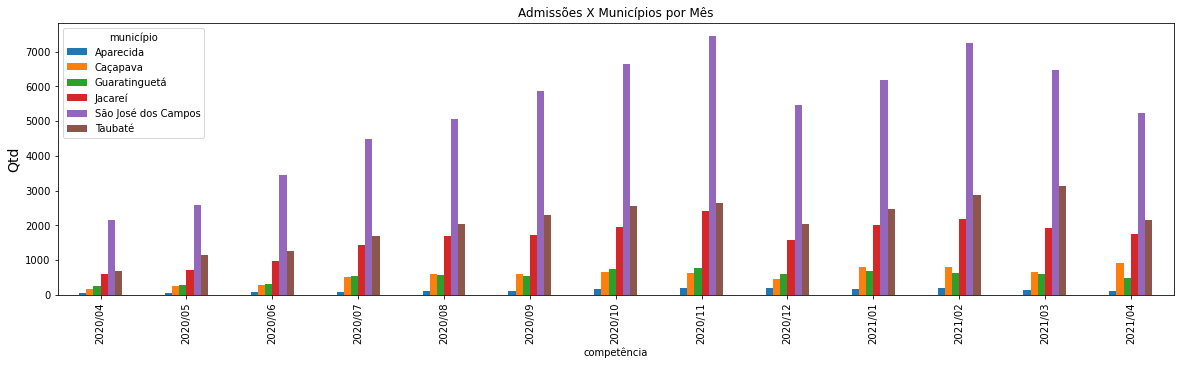

In [20]:
movimentacao2.query('tipomovimentação == "Admissão" and município == ["São José dos Campos", "Jacareí", "Taubaté", "Caçapava", "Guaratinguetá", "Aparecida"]').groupby(['competência',
        'município']).size().unstack().plot(kind='bar', 
                figsize = (20,5),title = 'Admissões X Municípios por Mês').set_ylabel('Qtd',fontsize=14)

In [16]:
movimentacao2.query('tipomovimentação == "Admissão" and município == ["São José dos Campos", "Jacareí", "Taubaté", "Caçapava", "Guaratinguetá", "Aparecida"]').groupby(['competência',
        'município']).size().sort_values(ascending=False)

competência  município          
2020/11      São José dos Campos    7455
2021/02      São José dos Campos    7248
2020/10      São José dos Campos    6636
2021/03      São José dos Campos    6483
2021/01      São José dos Campos    6180
                                    ... 
2021/04      Aparecida               108
2020/07      Aparecida                80
2020/06      Aparecida                72
2020/04      Aparecida                52
2020/05      Aparecida                43
Length: 78, dtype: int64

O gráfico abaixo compara as Demissões em algumas cidades do Vale do Paraíba:

Text(0, 0.5, 'Qtd')

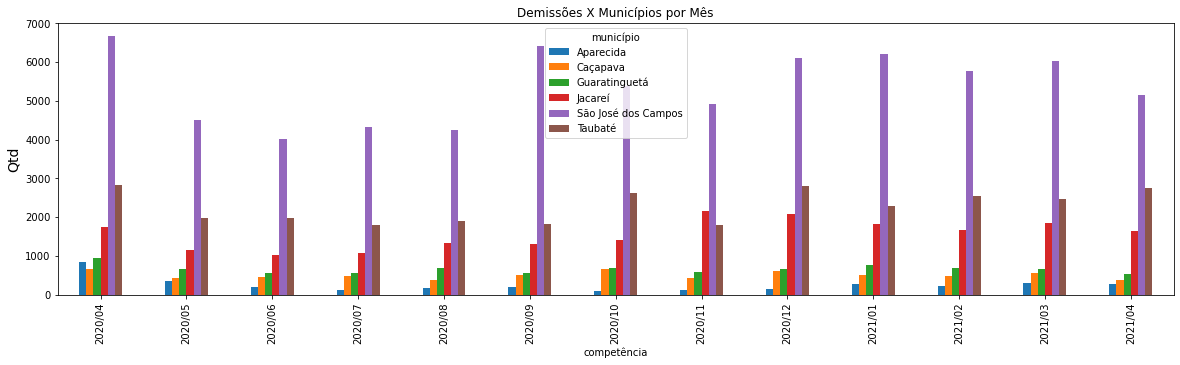

In [21]:
movimentacao2.query('tipomovimentação == "Demissão" and município == ["São José dos Campos", "Jacareí", "Taubaté", "Caçapava", "Guaratinguetá", "Aparecida"]').groupby(['competência',
        'município']).size().unstack().plot(kind='bar', 
                figsize = (20,5),title = 'Demissões X Municípios por Mês').set_ylabel('Qtd',fontsize=14)

In [18]:
movimentacao2.query('tipomovimentação == "Demissão" and município == ["São José dos Campos", "Jacareí", "Taubaté", "Caçapava", "Guaratinguetá", "Aparecida"]').groupby(['competência',
        'município']).size().sort_values(ascending=False)

competência  município          
2020/04      São José dos Campos    6680
2020/09      São José dos Campos    6425
2021/01      São José dos Campos    6211
2020/12      São José dos Campos    6097
2021/03      São José dos Campos    6033
                                    ... 
2020/08      Aparecida               168
2020/12      Aparecida               159
2020/11      Aparecida               129
2020/07      Aparecida               119
2020/10      Aparecida               105
Length: 78, dtype: int64

O gráfico abaixo apresenta as admissões e demissões em São José dos Campos:

Text(0, 0.5, 'Qtd')

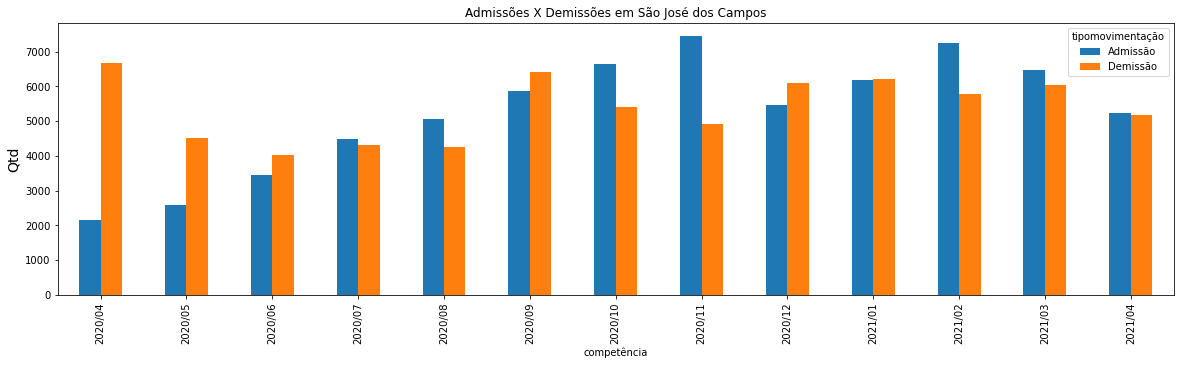

In [22]:
movimentacao2.query('tipomovimentação != "Não Identificado" and município == "São José dos Campos"').groupby(['competência',
         'tipomovimentação']).size().unstack().plot(kind='bar', 
                figsize = (20,5),title = 'Admissões X Demissões em São José dos Campos').set_ylabel('Qtd',fontsize=14)

In [23]:
movimentacao2.query('tipomovimentação != "Não Identificado" and município == "São José dos Campos"').groupby(['competência',
        'município', 'tipomovimentação']).size()

competência  município            tipomovimentação
2020/04      São José dos Campos  Admissão            2138
                                  Demissão            6680
2020/05      São José dos Campos  Admissão            2578
                                  Demissão            4510
2020/06      São José dos Campos  Admissão            3435
                                  Demissão            4009
2020/07      São José dos Campos  Admissão            4475
                                  Demissão            4323
2020/08      São José dos Campos  Admissão            5052
                                  Demissão            4241
2020/09      São José dos Campos  Admissão            5852
                                  Demissão            6425
2020/10      São José dos Campos  Admissão            6636
                                  Demissão            5395
2020/11      São José dos Campos  Admissão            7455
                                  Demissão            4917
2020/

In [24]:
troca_sexo = {1:'Homem', 3:'Mulher', 9: 'Não Identificado'}
movimentacao2['sexo'] = movimentacao2['sexo'].apply(lambda x: troca_sexo[x])

Comparamos as admissões/demissões de acordo com o gênero do trabalhador:

O gráfico abaixo compara as admissões em São José dos Campos por gênero:

Text(0, 0.5, 'Qtd')

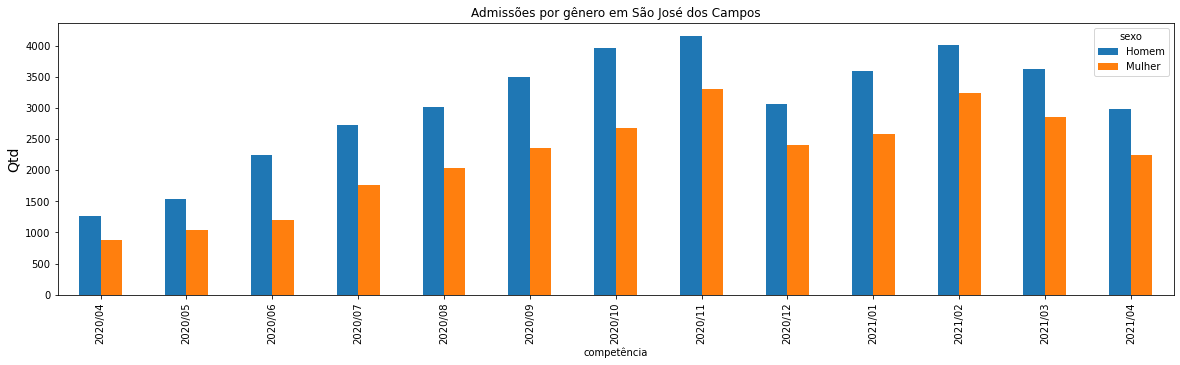

In [26]:
movimentacao2.query('tipomovimentação == "Admissão" and município == "São José dos Campos"').groupby(['competência',
         'sexo']).size().unstack().plot(kind='bar', 
                figsize = (20,5),title = 'Admissões por gênero em São José dos Campos').set_ylabel('Qtd',fontsize=14)

In [27]:
movimentacao2.query('tipomovimentação == "Admissão" and município == "São José dos Campos"').groupby(['competência',
         'sexo']).size()

competência  sexo  
2020/04      Homem     1259
             Mulher     879
2020/05      Homem     1543
             Mulher    1035
2020/06      Homem     2240
             Mulher    1195
2020/07      Homem     2721
             Mulher    1754
2020/08      Homem     3021
             Mulher    2031
2020/09      Homem     3501
             Mulher    2351
2020/10      Homem     3967
             Mulher    2669
2020/11      Homem     4157
             Mulher    3298
2020/12      Homem     3058
             Mulher    2404
2021/01      Homem     3593
             Mulher    2587
2021/02      Homem     4004
             Mulher    3244
2021/03      Homem     3630
             Mulher    2853
2021/04      Homem     2986
             Mulher    2238
dtype: int64

O gráfico abaixo compara as demissões em São José dos Campos por gênero:

Text(0, 0.5, 'Qtd')

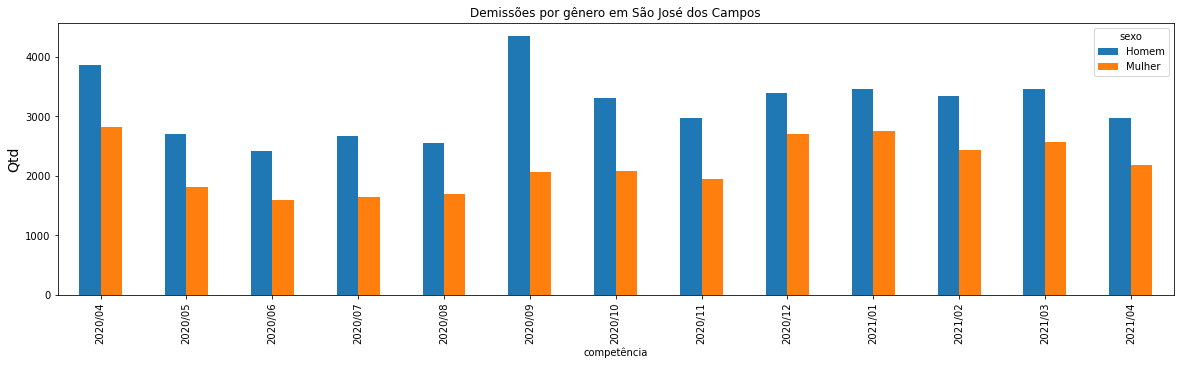

In [28]:
movimentacao2.query('tipomovimentação == "Demissão" and município == "São José dos Campos"').groupby(['competência',
         'sexo']).size().unstack().plot(kind='bar', 
                figsize = (20,5),title = 'Demissões por gênero em São José dos Campos').set_ylabel('Qtd',fontsize=14)

Apresentamos a diferença salárial entre homens e mulheres admitidos em São José dos Campos

(Text(0, 0.5, 'R$'),)

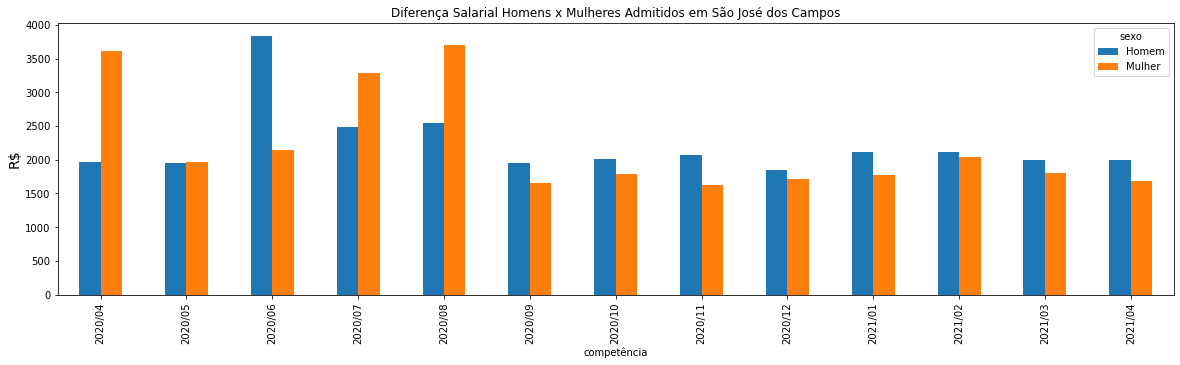

In [31]:
movimentacao2.query('tipomovimentação == "Admissão" and município == "São José dos Campos"').groupby(['competência',
                        'sexo'])["salário"].mean().unstack().plot(kind='bar', figsize = (20,5),
                                title = 'Diferença Salarial Homens x Mulheres Admitidos em São José dos Campos').set_ylabel('R$',fontsize=14),

In [32]:
movimentacao2.query('tipomovimentação == "Admissão" and município == "São José dos Campos"').groupby(['competência',
                        'sexo'])["salário"].mean()

competência  sexo  
2020/04      Homem     1962.818089
             Mulher    3608.786153
2020/05      Homem     1947.666116
             Mulher    1967.246919
2020/06      Homem     3836.146670
             Mulher    2147.850418
2020/07      Homem     2486.435420
             Mulher    3291.724973
2020/08      Homem     2542.377535
             Mulher    3698.966962
2020/09      Homem     1956.472617
             Mulher    1658.941403
2020/10      Homem     2003.456132
             Mulher    1792.202661
2020/11      Homem     2072.450720
             Mulher    1620.826817
2020/12      Homem     1845.211317
             Mulher    1717.753370
2021/01      Homem     2110.572386
             Mulher    1776.828391
2021/02      Homem     2121.664329
             Mulher    2037.951078
2021/03      Homem     2000.586879
             Mulher    1809.007976
2021/04      Homem     1995.800877
             Mulher    1679.838334
Name: salário, dtype: float64